# HW 2: Types of Data

#### CPE232 Data Models

##### Owner :  66070501043 - Phoorin Chinphuad
---

# Import Dependency

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 1 : Basic Python

## Task 1

เขียนโปรแกรมสำหรับใส่ค่า Input แต่ละ type ที่ต่างกัน ทำการแสดง type ของแต่ละตัว และทดลองแปลงค่า Float ให้กลายเป็น int พร้อมแสดง Before After

In [102]:
# Input values from the user
string_value = input("Enter a string: ")
integer_value = int(input("Enter an integer: "))
float_value = float(input("Enter a float: "))

In [108]:
# Display the data types
print(f"string_value type : {type(string_value)}")
print(f"integer_value type : {type(integer_value)}")
print(f"float_value type : {type(float_value)}")

string_value type : <class 'str'>
integer_value type : <class 'int'>
float_value type : <class 'float'>


In [109]:
# Convert integer to float and vice versa
print(f"Before converting : {integer_value} , {type(integer_value)}")
integer_To_float_value = float(integer_value)
print(f"After converting : {integer_To_float_value}, {type(integer_To_float_value)}")

Before converting : 37 , <class 'int'>
After converting : 37.0, <class 'float'>


In [110]:
# Show before and after convert float to int
print(f"Before converting : {float_value} , {type(float_value)}")
float_To_integer_value = int(float_value)
print(f"After converting : {float_To_integer_value}, {type(float_To_integer_value)}")

Before converting : 3.14 , <class 'float'>
After converting : 3, <class 'int'>


## Task 2

มีคะแนนของนักเรียนแต่ละคนให้ในรูปแบบ Dictionary จงหาคะแนนเฉลี่ยของนักเรียนแต่ละคนในทุกวิชาและหาคนที่ได้แคะแนนเฉลี่ยสูงสุด

In [111]:
students_grades = {
    "John": [85, 90, 78],
    "Alice": [88, 92, 80],
    "Bob": [75, 85, 72],
    "Diana": [90, 95, 94],
    "Charlie": [70, 65, 80]
}

In [112]:
# Calculate and print the average grade for each student
for name, grades in students_grades.items():
    avg_grade = sum(grades) / len(grades)
    print(f"{name} average grade : {avg_grade}")

John average grade : 84.33333333333333
Alice average grade : 86.66666666666667
Bob average grade : 77.33333333333333
Diana average grade : 93.0
Charlie average grade : 71.66666666666667


In [113]:
# Find the student with the highest average grade
avg_grade = {name : sum(grades)/len(grades) for name, grades in students_grades.items()}

top_student_name = max(avg_grade, key=avg_grade.get)
top_student_avg_grade = avg_grade[top_student_name]

print(f"The student with the highest average grade is {top_student_name} with an average of {top_student_avg_grade}")

The student with the highest average grade is Diana with an average of 93.0


# Part 2 : Working with CSV!

จงสร้างคอลัมน์ใหม่ให้กับ CSV ไฟล์นี้ชื่อว่า Bonus และให้คำนวณ Bonus ให้กับพนักงานที่อยู่แผนก Sales เป็นจำนวน 10% จาก MonthlyRate ของคนๆนั้น

In [117]:
# Load the CSV file
file_path = './sources/employee_data.csv'
df = pd.read_csv(file_path)

In [118]:
df.head()

,Age,DailyRate,Department,EducationField,Gender,MaritalStatus,MonthlyRate,OverTime
0,41,1102,Sales,Life Sciences,Female,Single,19479,Yes
1,49,279,Research & Development,Life Sciences,Male,Married,24907,No
2,37,1373,Research & Development,Other,Male,Single,2396,Yes
3,33,1392,Research & Development,Life Sciences,Female,Married,23159,Yes
4,27,591,Research & Development,Medical,Male,Married,16632,No


In [119]:
# Add new column call 'Bonus'
df['Bonus'] = 0.0

In [120]:
# Calculate 10% of bonus into the 'Bonus' Column .
df["Bonus"] = df["MonthlyRate"] * 0.1 * (df["Department"] == "Sales")

In [121]:
# Print and show result
df

,Age,DailyRate,Department,EducationField,Gender,MaritalStatus,MonthlyRate,OverTime,Bonus
0,41,1102,Sales,Life Sciences,Female,Single,19479,Yes,1947.9
1,49,279,Research & Development,Life Sciences,Male,Married,24907,No,0.0
2,37,1373,Research & Development,Other,Male,Single,2396,Yes,0.0
3,33,1392,Research & Development,Life Sciences,Female,Married,23159,Yes,0.0
4,27,591,Research & Development,Medical,Male,Married,16632,No,0.0
...,...,...,...,...,...,...,...,...,...
1465,36,884,Research & Development,Medical,Male,Married,12290,No,0.0
1466,39,613,Research & Development,Medical,Male,Married,21457,No,0.0
1467,27,155,Research & Development,Life Sciences,Male,Married,5174,Yes,0.0
1468,49,1023,Sales,Medical,Male,Married,13243,No,1324.3


In [122]:
# Save the updated DataFrame back to a CSV file
df.to_csv('./sources/employee_data.csv', index=False)

# Part 3 : Working with Matplotlib

จงพล็อตกราฟแสดงค่าเฉลี่ยเงินเดือนของพนักงานในแต่ละ Department เพื่อเปรียบเทียบเงินเดือนเฉลี่ยของแต่ละ Department

In [123]:
# Load CSV and create DataFrame
data = pd.read_csv('./sources/employee_data.csv')
df = pd.DataFrame(data)

In [124]:
# Calculate average MonthlyRate by Department
avg_monthly_rate_by_department = df.groupby('Department')['MonthlyRate'].mean()

avg_monthly_rate_by_department

Department
Human Resources           13492.984127
Research & Development    14284.865765
Sales                     14489.793722
Name: MonthlyRate, dtype: float64

In [125]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

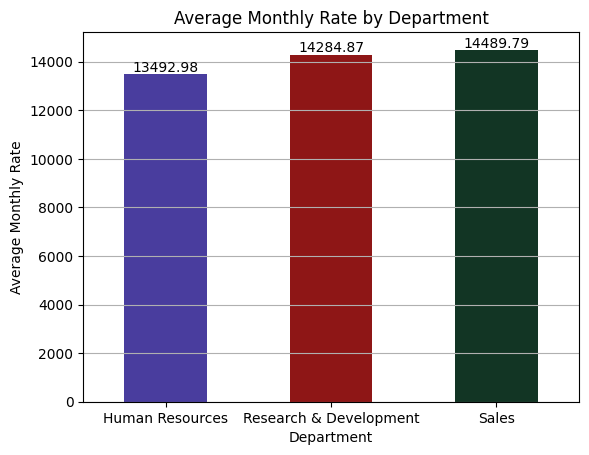

In [127]:
# Plotting the bar chart
avg_monthly_rate_by_department.plot(kind='bar', color=['#493D9E', '#8E1616', '#123524'])

plt.title('Average Monthly Rate by Department')
plt.xlabel('Department')
plt.ylabel('Average Monthly Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

for index, value in enumerate(avg_monthly_rate_by_department):
    plt.text(index, value+100, str(round(float(value),2)), ha='center')

plt.show()

# Challenge!!! : Working with SATAN (Optional)

ดีมากเหล่าเด็กๆที่ยังไม่ยอมแพ้ให้กับวิชานี้!

<div>
<img src="https://media2.giphy.com/media/ErZ8hv5eO92JW/200.gif?cid=6c09b952k9ykzx0na1tsrm5sa0gb4m4z39w5z6z65u05oohs&ep=v1_gifs_search&rid=200.gif&ct=g" width="500"/>
</div>


เรื่องมันมีอยู่ว่า จากไฟล์ CSV ที่พี่ไทให้น้องๆไป...มันไม่ใช่ไฟล์ธรรมดา แต่มันเป็นไฟล์ข้อมูลในองกรณ์หนึ่งที่ Alya-San นั้นได้ทำงานอยู่

<div>
<img src="https://preview.redd.it/all-hail-alya-v0-8tiwrh5d3b3e1.jpeg?auto=webp&s=f22e38e7544697d75f2264f005504e5eb81a9721" width="500"/>
</div>

ซึ่งคุณอาเรียรู้สึกว่ามีสิ่งไม่ชอบมาพากลภายในบริษัท ว่ารายได้ของพนักงานชายและหญิงมีความไม่เท่าเทียมกัน

รวมถึงรัฐอาจมีการแทรกแทรงเพื่อให้ประชากรภายในประเทศเพิ่มสูงขึ้น รัฐจึงแอบเพิ่มเงินเดือนให้กับผู้ที่แต่งงานอยู่รึเปล่าเมื่อเทียบกับคนโสด

และคนที่จบจากสาขาที่แตกต่างจากกัน พวกเขาได้เงินเดือนมากกว่ากันมากน้อยแค่ไหน

น้องๆช่วยคุณอาเรียพิสูจน์หน่อยว่าคุณอาเรียไปเองหรือมันเป็นเรื่องจริง!

เพราะสำหรับคุณอาเรียแล้ว ทุกคนล้วน เ ท่ า เ ที ย ม กั น

---

# **Data Analysis & Visualization**

In [128]:
# Load CSV and create DataFrame
df = pd.read_csv('./sources/employee_data.csv')
df

,Age,DailyRate,Department,EducationField,Gender,MaritalStatus,MonthlyRate,OverTime,Bonus
0,41,1102,Sales,Life Sciences,Female,Single,19479,Yes,1947.9
1,49,279,Research & Development,Life Sciences,Male,Married,24907,No,0.0
2,37,1373,Research & Development,Other,Male,Single,2396,Yes,0.0
3,33,1392,Research & Development,Life Sciences,Female,Married,23159,Yes,0.0
4,27,591,Research & Development,Medical,Male,Married,16632,No,0.0
...,...,...,...,...,...,...,...,...,...
1465,36,884,Research & Development,Medical,Male,Married,12290,No,0.0
1466,39,613,Research & Development,Medical,Male,Married,21457,No,0.0
1467,27,155,Research & Development,Life Sciences,Male,Married,5174,Yes,0.0
1468,49,1023,Sales,Medical,Male,Married,13243,No,1324.3


In [129]:
# Create Total Inccome (MonthlyRate + Bonus)
df['TotalIncome'] = df['MonthlyRate'] + df['Bonus']
df

,Age,DailyRate,Department,EducationField,Gender,MaritalStatus,MonthlyRate,OverTime,Bonus,TotalIncome
0,41,1102,Sales,Life Sciences,Female,Single,19479,Yes,1947.9,21426.9
1,49,279,Research & Development,Life Sciences,Male,Married,24907,No,0.0,24907.0
2,37,1373,Research & Development,Other,Male,Single,2396,Yes,0.0,2396.0
3,33,1392,Research & Development,Life Sciences,Female,Married,23159,Yes,0.0,23159.0
4,27,591,Research & Development,Medical,Male,Married,16632,No,0.0,16632.0
...,...,...,...,...,...,...,...,...,...,...
1465,36,884,Research & Development,Medical,Male,Married,12290,No,0.0,12290.0
1466,39,613,Research & Development,Medical,Male,Married,21457,No,0.0,21457.0
1467,27,155,Research & Development,Life Sciences,Male,Married,5174,Yes,0.0,5174.0
1468,49,1023,Sales,Medical,Male,Married,13243,No,1324.3,14567.3


---

## Determine if the total income for males and females are unequal ?

In [130]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

<Figure size 600x500 with 0 Axes>

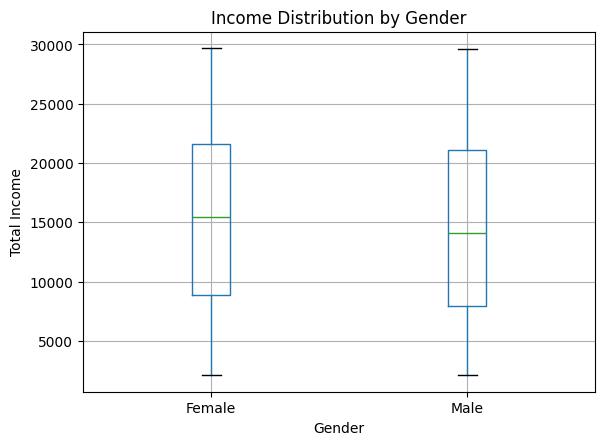

In [131]:
# Boxplot for salary distribution by gender
plt.figure(figsize=(6, 5))
df.boxplot(column='TotalIncome', by='Gender', grid=True)
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Income")
plt.suptitle("")
plt.show()

In [132]:
avg_income_by_gender = df.groupby('Gender')['TotalIncome'].mean()
avg_income_by_gender

Gender
Female    15130.568707
Male      14500.830385
Name: TotalIncome, dtype: float64

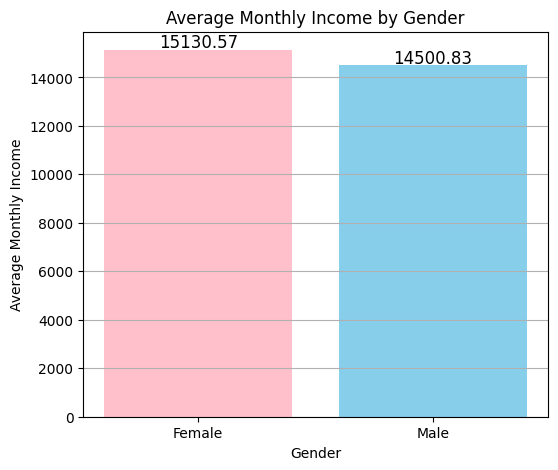

In [133]:
# Plot bar chart
plt.figure(figsize=(6, 5))
plt.bar(avg_income_by_gender.index, avg_income_by_gender.values, color=['pink', 'skyblue'])
plt.title("Average Monthly Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Monthly Income")
plt.grid(axis='y')

# Add values on bars
for i, v in enumerate(avg_income_by_gender.values):
    plt.text(i, v + 100, str(round(v, 2)), ha='center', fontsize=12)

plt.show()

**Determine if the monthly rate for males and females are unequal ?**

**DIAGNOS** :  Since the box plot shows that the total income distribution of both **male** and **female** employees is similarly grouped, I decided to compare the data using the **average total income**. The bar chart reveals that, on average, **female employees** earn **$15,130.57**, while **male employees** earn **$14,500.83**, making the **female bar** slightly higher than the **male bar**. This suggests that, overall, **female employees** tend to have a higher total income than their **male counterparts**. ✔️

---

## Determine if the state secretly increases the monthly rates of married individuals compared to those who are single ?

In [134]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

<Figure size 600x500 with 0 Axes>

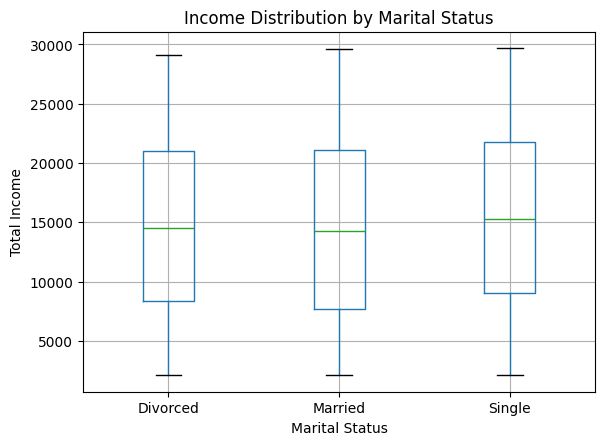

In [135]:
# Boxplot for salary distribution by Marital Status
plt.figure(figsize=(6, 5))
df.boxplot(column='TotalIncome', by='MaritalStatus', grid=True)
plt.title("Income Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Total Income")
plt.suptitle("")
plt.show()

In [136]:
avg_income_by_status = df.groupby('MaritalStatus')['TotalIncome'].mean()
avg_income_by_status

MaritalStatus
Divorced    14689.092355
Married     14483.687964
Single      15182.237447
Name: TotalIncome, dtype: float64

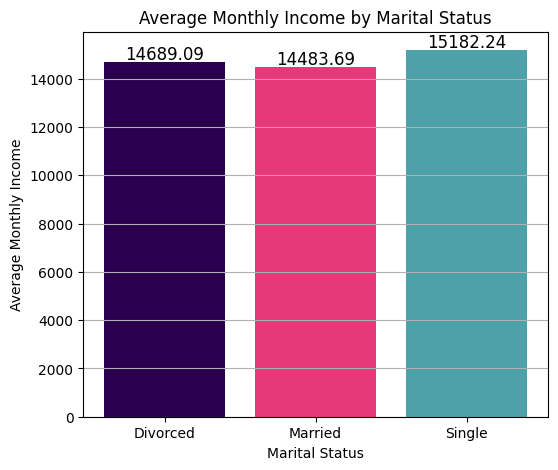

In [137]:
# Plot bar chart
plt.figure(figsize=(6, 5))
plt.bar(avg_income_by_status.index, avg_income_by_status.values, color=['#2A004E', '#E73879', '#4DA1A9'])
plt.title("Average Monthly Income by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Monthly Income")
plt.grid(axis='y')

# Add values on bars
for i, v in enumerate(avg_income_by_status.values):
    plt.text(i, v + 100, str(round(v, 2)), ha='center', fontsize=12)

plt.show()

**Determine if the state secretly increases the monthly rates of married individuals compared to those who are single ?**

**DIAGNOS** : Since the box plot shows that the total income distribution of **single** and **married** employees is similarly grouped, and if divorced individuals are excluded from the single category, I decided to compare the data using the **average total income**. The bar chart reveals that, on average, **single employees** earn **$15,182.24**, divorced employees earn **$14,689.09**, and **married employees** earn **$14,483.69**, making the **single group** slightly higher than the others. This suggests that there is no clear evidence that the state is secretly increasing the monthly wages of **married individuals** compared to those who are **single**. 🤔

---

## How does the salary vary among graduates from different fields of study?

In [138]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

<Figure size 1200x500 with 0 Axes>

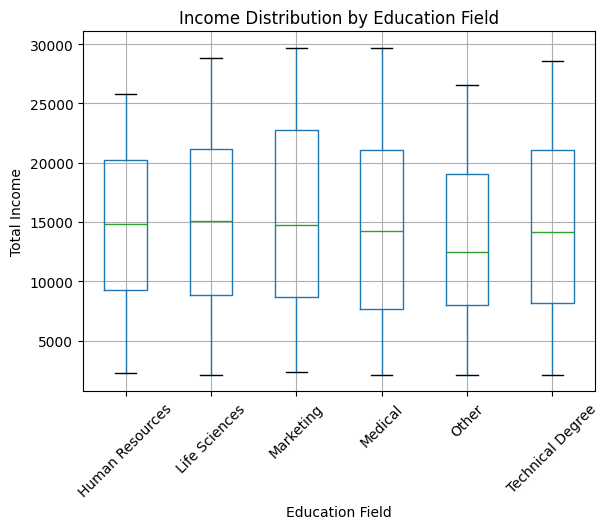

In [139]:
# Boxplot for salary distribution by education field
plt.figure(figsize=(12, 5))
df.boxplot(column='TotalIncome', by='EducationField', grid=True, rot=45)
plt.title("Income Distribution by Education Field")
plt.xlabel("Education Field")
plt.ylabel("Total Income")
plt.suptitle("")
plt.show()

In [140]:
max_income_by_EducateField = df.groupby('EducationField')['TotalIncome'].max()
max_income_by_EducateField

EducationField
Human Resources     25811.0
Life Sciences       28824.4
Marketing           29654.9
Medical             29696.7
Other               26537.0
Technical Degree    28547.2
Name: TotalIncome, dtype: float64

In [141]:
min_income_by_EducateField = df.groupby('EducationField')['TotalIncome'].min()
min_income_by_EducateField

EducationField
Human Resources     2243.0
Life Sciences       2125.0
Marketing           2350.7
Medical             2094.0
Other               2112.0
Technical Degree    2125.0
Name: TotalIncome, dtype: float64

In [142]:
avg_income_by_EducateField = df.groupby('EducationField')['TotalIncome'].mean()
avg_income_by_EducateField

EducationField
Human Resources     14810.740741
Life Sciences       14889.631683
Marketing           15484.637736
Medical             14581.010991
Other               13545.251220
Technical Degree    14584.415909
Name: TotalIncome, dtype: float64

**How does the salary vary among graduates from different fields of study?**

**DIAGNOS** : The box plot indicates that when comparing the **highest total incomes**, the **Marketing** and **Medical** fields have similar earnings, both ranking at the top. When looking at the **lowest total incomes**, all fields appear to have similar distributions. However, when comparing **average incomes**, most fields show very similar values, except for the **Other** category, which has a noticeably lower average than the rest. 💼



เนื่องจากโคบายาชิซังจะเป็นคนตรวจโค้ดของน้องๆ

ขอให้น้องๆแสดงข้อมูลอย่างเข้าใจง่ายและแม่นยำ ไม่ฉะนั้นโคบายาชิซังจะทำการไล่น้องๆออกจากบริษัทนะครับ

<div>
<img src="https://i.redd.it/gwmyhe5g0av71.gif" width="500"/>
</div>